In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.linear_model

In [2]:
df = pd.read_csv("../final_projects/assets/ufo_reports.csv", sep='\t')
df=df[(~df.Long.isnull()) & (~df.Lat.isnull())]
df.columns
df.shape


(12172, 30)

In [3]:
from datetime import datetime
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [4]:
features = ['Date','Lat', 'Long', 'City', 'State']
data = pd.DataFrame(df, columns=features)
data['Diff'] = data['Date'].apply(lambda x: days_between(str(x), '2014-01-01'))
data.head(2)

,Date,Lat,Long,City,State,Diff
0,2015-12-31,44.052069,-123.086746,Eugene,OR,729
1,2015-12-31,44.848449,-123.233987,Monmouth,OR,729


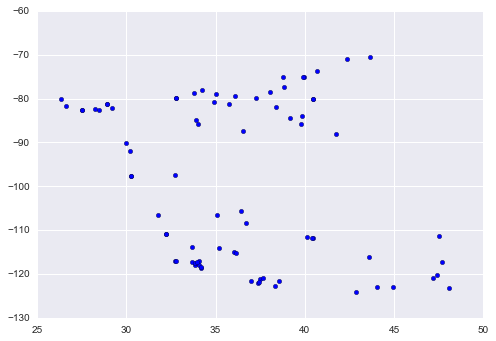

In [5]:
df_single = df[df.Date=='2014-01-01']
plt.scatter(df_single['Lat'], df_single['Long'])

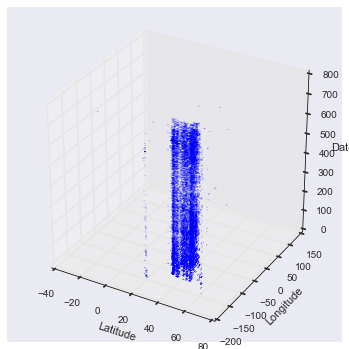

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
dataz = np.array(data['Diff'])
datax = np.array(data['Lat'])
datay = np.array(data['Long'])

for i in range(len(datax)-1):
    ax.quiver3D(datax[i], datay[i], dataz[i],datax[i+1], datay[i+1], dataz[i+1])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
ax.set_zlabel('Date')

In [7]:
data=[]
for i in range(0,len(datax)):
    data.append([datax[i], datay[i], dataz[i]])
data = np.array(data)

# Calculate the mean of the points, i.e. the 'center' of the cloud
datamean = data.mean(axis=0)
datamean[0] = int(datamean[0])

# Do an SVD on the mean-centered data.
uu, dd, vv = np.linalg.svd(data - datamean)
linepts = vv[0] * np.mgrid[-1000:2000:1][:, np.newaxis]
linepts += datamean

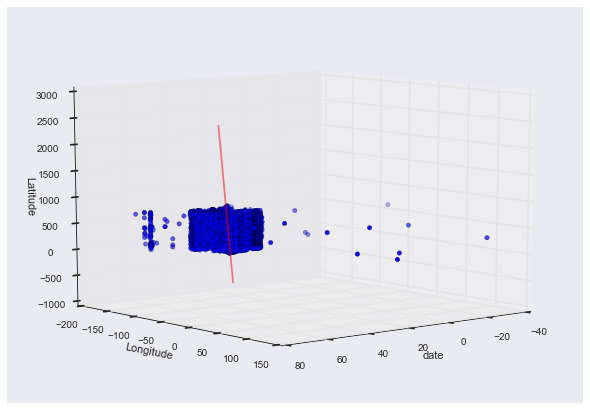

In [8]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as m3d

ax = m3d.Axes3D(plt.figure())
ax.scatter3D(*data.T)
ax.plot3D(*linepts.T, c='red', alpha=0.5)
ax.view_init(elev=10, azim=50)
plt.xlabel('date')
plt.ylabel('Longitude')
ax.set_zlabel('Latitude')
plt.show()

In [9]:
import numpy as np

#data
data=[]
for i in range(0,len(datax)):
    data.append([dataz[i], datay[i], datax[i]])
data = np.array(data)

# Calculate the mean of the points, i.e. the 'center' of the cloud
datamean = data.mean(axis=0)
datamean[0] = int(datamean[0])

# Do an SVD on the mean-centered data.
uu, dd, vv = np.linalg.svd(data - datamean)

# Now vv[0] contains the first principal component, i.e. the direction
# vector of the 'best fit' line in the least squares sense.
# generate some points along this best fit line, for plotting.
#we want it to have mean 0 (like the points we did
# the svd on). Also, it's a straight line, so we only need 2 points.
linepts = vv[0] * np.mgrid[-1000:2000:1][:, np.newaxis]

# shift by the mean to get the line in the right place
linepts += datamean

In [10]:
print linepts[:,0]

[ 1364.9963381   1363.99634176  1362.99634543 ..., -1631.99268719
 -1632.99268353 -1633.99267986]


In [11]:

for i in range(0,len(linepts)):
    linepts[i,0]= int(linepts[i,0]+1)
print linepts[:,0]

[ 1365.  1364.  1363. ..., -1630. -1631. -1632.]


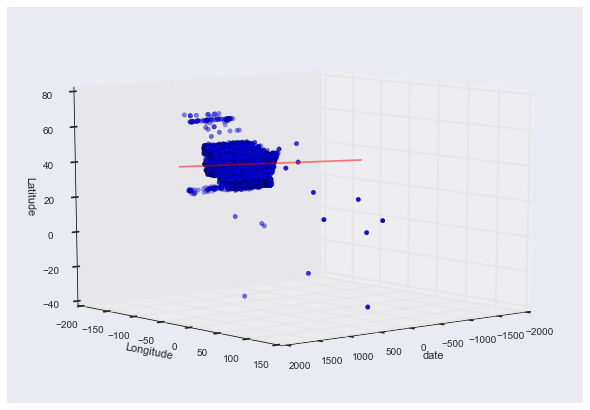

In [12]:
# Verify that everything looks right.
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as m3d

ax = m3d.Axes3D(plt.figure())
ax.scatter3D(*data.T)
ax.plot3D(*linepts.T, c='red', alpha=0.5)
ax.view_init(elev=10, azim=50)
plt.xlabel('date')
plt.ylabel('Longitude')
ax.set_zlabel('Latitude')
plt.show()

In [13]:
print data[10,1]

-122.989829206


In [14]:
array = linepts[linepts[:,0]==data[10,0]]

In [15]:
print array

[[ 712.          -95.00134425   38.65625717]]


In [16]:
print array[0,1]

-95.001344255


In [17]:
import math
def error(data, line_model):
    err = 0
    l = len(data)
    for i in range(0,l):
        array = line_model[(line_model[:,0]== data[i,0])]
        err += (data[i,1] - array[0,1]) ** 2 + (data[i,2] - array[0,2]) ** 2
    err = math.sqrt(err)
    return err/(data[:, 2].max()-data[:,2].min())

In [18]:
print days_between('2016-06-11','2014-01-01')

892


In [19]:
print 'eulicdean distance error', error(data, linepts)

eulicdean distance error 21.9804077096


In [28]:
from geopy.geocoders import ArcGIS
from geopy.exc import GeocoderTimedOut

In [30]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.reverse("38.95675005, -95.38474512")
print(location.address)

661, N 1500 Road, Kanwaka, Douglas County, Kansas, 66049, United States of America
